In [1]:
from meerkat import ds3231, parser

import pandas as pd

from importlib import reload

In [2]:
rtc = ds3231.DS3231(bus_n=1)

In [3]:
rtc.get_time()

(2020, 10, 28, 11, 18, 12)

In [4]:
rtc.get_temp()

24.0

In [5]:
rtc.publish(description="test_1", n=1)

'{"description": "test_1", "sample_n": 0, "rtc_time": "2020-10-28 11:18:12", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:16.383601"}'

In [6]:
rtc.publish(description="test_1", n=2, delay=3)

['{"description": "test_1", "sample_n": 0, "rtc_time": "2020-10-28 11:18:12", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:16.401710"}',
 '{"description": "test_1", "sample_n": 0, "rtc_time": "2020-10-28 11:18:15", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:19.407046"}']

In [7]:
# default writer format is CSV, switch to JSON
rtc.writer_output = 'json'

In [8]:
# writer method with description and sample number
rtc.write(description='test_2', n=6, delay=1)

In [9]:
rtc.json_writer.path

'2020_10_28_11_19_22_DS3231.jsontxt'

In [10]:
with open(rtc.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_2", "sample_n": 0, "rtc_time": "2020-10-28 11:18:18", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:22.475596"}
{"description": "test_2", "sample_n": 1, "rtc_time": "2020-10-28 11:18:19", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:23.479587"}
{"description": "test_2", "sample_n": 2, "rtc_time": "2020-10-28 11:18:20", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:24.483258"}
{"description": "test_2", "sample_n": 3, "rtc_time": "2020-10-28 11:18:21", "temp_C": 24.0, "std_time_ms": "2020-10-28 11:19:25.486916"}


In [11]:
# switch back to CSV format
rtc.writer_output = 'csv'

In [12]:
rtc.write(description='test_3', n=6, delay=1)

In [13]:
m, df = parser.csv_resource(rtc.csv_writer.path)

In [14]:
df["rtc_datetime64_ns"] = pd.to_datetime(df.rtc_time)
df.temp_C = df.temp_C.astype(float)

In [15]:
df.dtypes

std_time_ms                  object
description                  object
sample_n                      int64
rtc_time                     object
temp_C                      float64
datetime64_ns        datetime64[ns]
rtc_datetime64_ns    datetime64[ns]
dtype: object

In [16]:
df

,std_time_ms,description,sample_n,rtc_time,temp_C,datetime64_ns,rtc_datetime64_ns
0,2020-10-28 11:19:28.611864,test_3,0,2020-10-28 11:18:25,24.0,2020-10-28 11:19:28.611864,2020-10-28 11:18:25
1,2020-10-28 11:19:29.615414,test_3,1,2020-10-28 11:18:26,24.0,2020-10-28 11:19:29.615414,2020-10-28 11:18:26
2,2020-10-28 11:19:30.618929,test_3,2,2020-10-28 11:18:27,24.0,2020-10-28 11:19:30.618929,2020-10-28 11:18:27
3,2020-10-28 11:19:31.622347,test_3,3,2020-10-28 11:18:28,24.0,2020-10-28 11:19:31.622347,2020-10-28 11:18:28
4,2020-10-28 11:19:32.625879,test_3,4,2020-10-28 11:18:29,24.0,2020-10-28 11:19:32.625879,2020-10-28 11:18:29
5,2020-10-28 11:19:33.629407,test_3,5,2020-10-28 11:18:30,24.0,2020-10-28 11:19:33.629407,2020-10-28 11:18:30


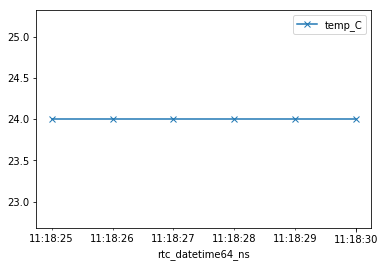

In [17]:
df[["rtc_datetime64_ns", "temp_C"]].plot(x="rtc_datetime64_ns", marker="x");